# Notebook Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

In [2]:
TOKEN_SPAM_PROB_FILE = 'SpamData/03_Testing/prob-spam.txt'
TOKEN_HAM_PROB_FILE = 'SpamData/03_Testing/prob-nonspam.txt'
TOKEN_ALL_PROB_FILE = 'SpamData/03_Testing/prob-all-tokens.txt'

TEST_FEATURE_MATRIX = 'SpamData/03_Testing/test-features.txt'
TEST_TARGET_FILE = 'SpamData/03_Testing/test-target.txt'
VOCAB_SIZE = 2500

# load the Data

In [3]:
# Features 
X_test = np.loadtxt(TEST_FEATURE_MATRIX, delimiter=' ')
# Target
y_test = np.loadtxt(TEST_TARGET_FILE, delimiter=' ')
# Token Probabilities
prob_token_spam = np.loadtxt(TOKEN_SPAM_PROB_FILE, delimiter=' ')
prob_token_ham = np.loadtxt(TOKEN_HAM_PROB_FILE, delimiter=' ')
prob_all_tokens = np.loadtxt(TOKEN_ALL_PROB_FILE, delimiter=' ')

In [4]:
X_test[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 2., 1., ..., 0., 0., 0.],
       [3., 0., 1., ..., 0., 0., 0.],
       [5., 1., 2., ..., 0., 0., 0.],
       [1., 2., 0., ..., 0., 0., 0.]])

# Calculating the Joint Probability

### Set the Prior

$$P(Spam \, | \, X) = \frac{P(X \, | \, Spam) \, P(Spam)} {P(X)}$$

In [7]:
PROB_SPAM = .3116

In [8]:
np.log(prob_token_spam)

array([ -4.70632085,  -5.32161816,  -4.98677062, ...,  -9.20111798,
        -8.70034269, -10.40509078])

## Joint probability in log format

In [9]:
joint_log_spam = X_test.dot(np.log(prob_token_spam) - np.log(prob_all_tokens)) + np.log(PROB_SPAM)

In [11]:
joint_log_spam[:5]

array([  3.21643926,  13.38035269,  19.20668974, -16.61242345,
        27.93765399])

$$P(Ham \, | \, X) = \frac{P(X \, | \, Ham) \, (1 - P(Spam))} {P(X)}$$

In [12]:
joint_log_ham = X_test.dot(np.log(prob_token_ham) - np.log(prob_all_tokens)) + np.log(1 - PROB_SPAM)

In [13]:
joint_log_ham[:5]

array([-11.05063426, -36.94310619, -38.25679825,  -2.70364873,
       -60.15266519])

In [14]:
joint_log_ham.size

1723

# Making Predictions

### Checking for the higher joint probability

$$P(Spam \, | \, X) \, > \, P(Ham \, | \, X)$$
<center>OR</center>
<br>
$$P(Spam \, | \, X) \, < \, P(Ham \, | \, X)$$

In [16]:
prediction = joint_log_spam > joint_log_ham

In [19]:
prediction[-5:]

array([False, False, False, False, False])

In [18]:
y_test[-5:]

array([0., 0., 0., 0., 0.])

## Simplified


In [20]:
joint_log_spam = X_test.dot(np.log(prob_token_spam)) + np.log(PROB_SPAM)
joint_log_ham  = X_test.dot(np.log(prob_token_ham)) + np.log(1 - PROB_SPAM)

## Metrics and Evaluation

### Accuracy

In [25]:
correct_docs = (y_test == prediction).sum()
print('Docs classified correctly', correct_docs)
numdocs_wrong = X_test.shape[0] - correct_docs
print('Docs classified incorreclty', numdocs_wrong)

Docs classified correctly 1671
Docs classified incorreclty 52


In [26]:
# Accuracy
correct_docs / len(X_test)

0.9698200812536274

In [30]:
fraction_wrong = numdocs_wrong / len(X_test)
print('Fraction classified incorrectly is {:.2%}'.format(fraction_wrong))
print('Accuracy of the model is {:.2%}'.format(1 - fraction_wrong))

Fraction classified incorrectly is 3.02%
Accuracy of the model is 96.98%


## Visualising the Results

In [37]:
# Chart Styling Info
yaxis_label = 'P(X | Spam)'
xaxis_label = 'P(X | NonSpam)'

linedata = np.linspace(-14_000, 1, 1_000)

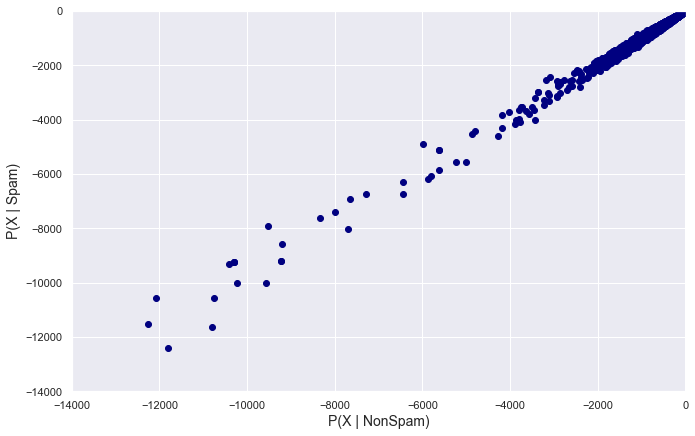

In [36]:
plt.figure(figsize=(11, 7))
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set scale
plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy')
plt.show()

## The Decision boundry

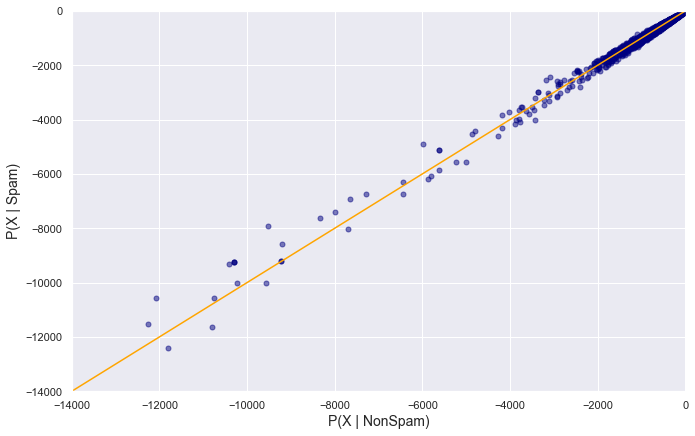

In [43]:
plt.figure(figsize=(11, 7))
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set scale
plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', 
           alpha=.5, s=25)
plt.plot(linedata, linedata, color='orange')
plt.show()

C:\Users\amir\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


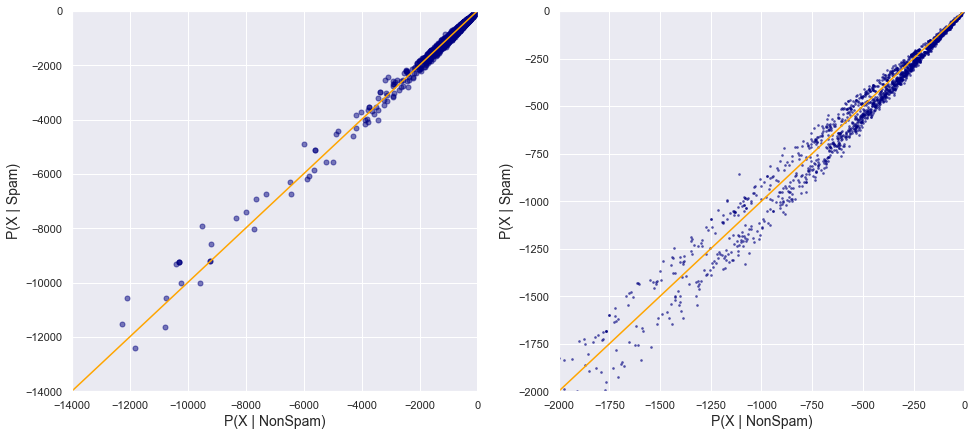

In [45]:
plt.figure(figsize=(16, 7))

# Chart Nr 1:
plt.subplot(1, 2, 1)

plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set scale
plt.xlim([-14000, 1])
plt.ylim([-14000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', 
           alpha=.5, s=25)
plt.plot(linedata, linedata, color='orange')

# Chart Nr 2:
plt.subplot(1, 2, 2)
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

# Set scale
plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.scatter(joint_log_ham, joint_log_spam, color='navy', 
           alpha=.5, s=3)
plt.plot(linedata, linedata, color='orange')

plt.subplot(1, 2, 2)
plt.show()

In [47]:
# Chart Styling
sns.set_style('whitegrid')
labels = 'Actual Category'

summary_df = pd.DataFrame({yaxis_label: joint_log_spam, xaxis_label: joint_log_ham, 
                          labels: y_test})

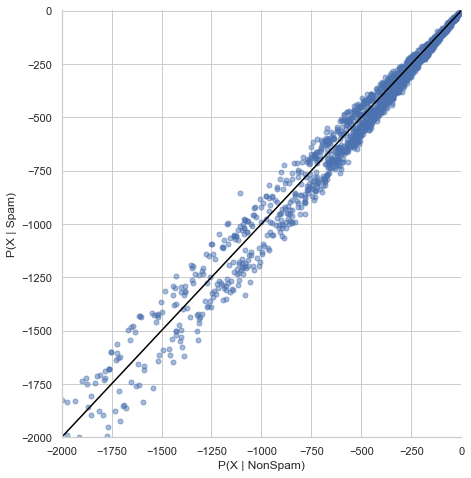

In [53]:
sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, height=6.5, fit_reg=False, 
          scatter_kws={'alpha': .5, 's': 25})
plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.plot(linedata, linedata, color='black')

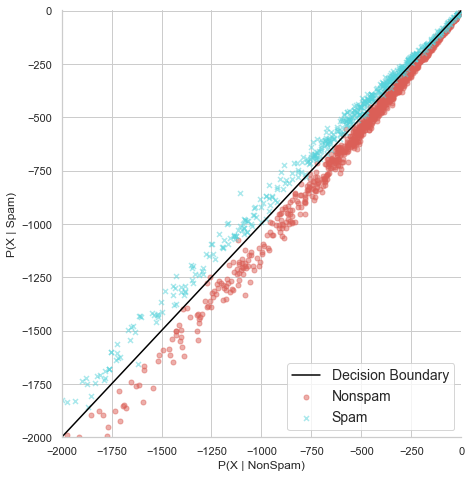

In [63]:
sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, height=6.5, fit_reg=False, 
          scatter_kws={'alpha': .5, 's': 25}, hue=labels, markers=['o', 'x'], palette='hls', 
           legend=False)
plt.xlim([-2000, 1])
plt.ylim([-2000, 1])

plt.plot(linedata, linedata, color='black')

plt.legend(('Decision Boundary', 'Nonspam', 'Spam'), loc='lower right', fontsize=14);

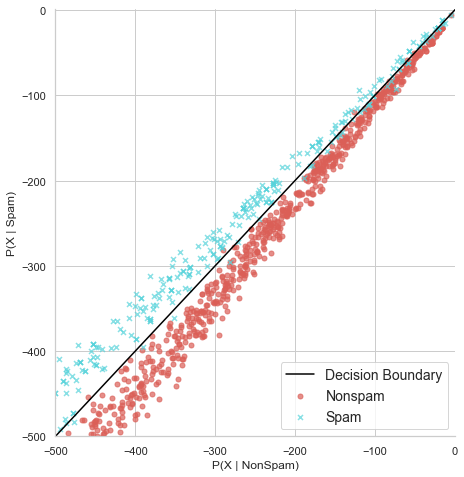

In [68]:
sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, height=6.5, fit_reg=False, 
          scatter_kws={'alpha': .7, 's': 25}, hue=labels, markers=['o', 'x'], palette='hls', 
           legend=False)
plt.xlim([-500, 1])
plt.ylim([-500, 1])
 
plt.plot(linedata, linedata, color='black')

plt.legend(('Decision Boundary', 'Nonspam', 'Spam'), loc='lower right', fontsize=14);

### False Positives and False Negatives

In [69]:
np.unique(prediction, return_counts=True)

(array([False,  True]), array([1163,  560], dtype=int64))

In [74]:
true_pos = (y_test == 1) & (prediction == 1)

In [75]:
true_pos.sum()

548

In [96]:
false_pos = (y_test == 0) & (prediction == 1)
false_pos.sum()

12

In [86]:
false_neg = (y_test == 1) & (prediction == 0)
false_neg.sum()

40

In [87]:
true_neg = (y_test == 0) & (prediction == 0)
true_neg.sum()

1123

## Recal Score

In [91]:
recall_score = true_pos.sum() / (true_pos.sum() + false_neg.sum())
print('Recall score is {:.2%}'.format(recall_score))

Recall score is 93.20%


## Precision Score

In [102]:
precision_score = true_pos.sum() / (true_pos.sum() + false_pos.sum())
print('Precision score is {:.3}'.format(precision_score))

Precision score is 0.979


## F-Score or F1 Score

In [100]:
f1_score = 2 * (precision_score * recall_score) / (precision_score + recall_score)
print('F Score is {:.2}'.format(f1_score))

F Score is 0.95
